# Code to plot the correlation functions

In [2]:
%matplotlib inline
from astropy.io import fits as pf
from astroML.correlation import two_point, bootstrap_two_point
import numpy as np
from matplotlib import *
from pylab import *
import pylab as plt
from time import time
from scipy.optimize import curve_fit


/home/john/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
##########################
###Open data set
##########################

infile = '../Xis_Candidates.txt'

data = open(infile,'rw')

header=data.readline()

sep=[]
xifull=[]
sigma=[]
RR=[]
DD=[]
dat=data.readlines()
for i in range(len(dat)):
    sep.append(float(dat[i].split()[0]))
    xifull.append(float(dat[i].split()[4]))
    sigma.append(float(dat[i].split()[5]))
    RR.append(float(dat[i].split()[3]))
    DD.append(float(dat[i].split()[1]))
#Calculate Poisson error

Poisson_err = (1+np.array(xifull))/np.sqrt(1.0*np.array(DD))

LS_err = (1+np.array(xifull))/np.sqrt(4996.0)

print 'Poisson Errors calculated'


Poisson Errors calculated


In [4]:
##########################
###Open ANDREW's data set
##########################

cinfile = 'SpSh_fullcorr_test_v3_clib.txt'
#infile = 'TEST_Boxcut_v1.txt'
cdata = open(cinfile,'rw')

cheader=cdata.readline()

csep=[]
cxifull=[]
#csigma=[]
cRR=[]
cDD=[]
cdat=cdata.readlines()
for i in range(len(cdat)):
    csep.append(float(cdat[i].split()[0]))
    cxifull.append(float(cdat[i].split()[4]))
    #csigma.append(float(cdat[i].split()[5]))
    cRR.append(float(cdat[i].split()[3]))
    cDD.append(float(cdat[i].split()[1]))



IOError: [Errno 2] No such file or directory: 'SpSh_fullcorr_test_v3_clib.txt'

In [5]:
def Model(r,s,d):
    xi = (r/s)**(-d)
    return xi

#def Model(r,s):
#    xi = (r/s)**(-2)
#    return xi

Rad = np.asarray(sep)
gdx = (Rad>8) & (Rad<25)
popt, pcov = curve_fit(Model,Rad[gdx],np.asarray(xifull)[gdx],sigma=np.asarray(sigma)[gdx])
print popt

[ 3.9495077   1.66213423]


In [6]:
#Shen Test
#The Shen 2007 data
Shenxi = [0,0,0,16.5,0,3.54,1.26,0.663,0.191,0.131,0.236,-0.28,0.361,0.101,0.0384,0.0368,0.0101,0.0194,-0.00396,0.0101,-0.00296,0.00214]
Shenr = [2.244,2.825,3.557,4.477,5.637,7.096,8.934,11.25,14.16,17.83,22.44,28.25,35.57,44.77,56.37,70.96,89.34,112.5,141.6,178.3,224.4,282.5]
Shenerr = [0,0,0,12.8,0,3.61,1.88,0.733,0.786,0.472,0.175,0.223,0.170,0.121,0.0862,0.0644,0.0382,0.0250,0.0219,0.0134,0.00672,0.00953]


In [8]:
##############################

#OPEN THE ROSS 2009 DATA TO COMPARE
data=open('./k_output_UNI22.dat','r')

r=[]
Xi=[]
errxi = []

for i in data.readlines():
	val=i.split()
	r.append(float(val[0]))
	Xi.append(float(val[7]))
	errxi.append(float(val[8]))
	
R=np.array(r)




In [9]:
#Eftekharzadeh 2015 points

Exi = [2.556,1.663,2.406,1.654,1.020,1.034,0.676,0.562,0.433,0.291,0.193,0.150,0.090,0.069,0.040,0.020,0.010,-0.000,0.004]
Es  = [3.06,3.70,4.48,5.41,6.55,7.92,9.59,11.60,14.03,16.97,20.54,24.84,30.06,36.37,43.10,53.23,64.40,77.92,94.27]
Eerr= [0.609,0.384,0.318,0.213,0.132,0.101,0.069,0.050,0.036,0.026,0.018,0.014,0.010,0.007,0.006,0.004,0.003,0.002,0.002]

In [10]:
#Andrew's code results for xi(s)

Axi = [-0.81,-0.99,2.1,-0.24,3.60,1.80,1.46,1.43,1.15,1.37,1.23,1.21,1.24,1.13,1.23,1.17,1.13,1.11,1.17,1.15]




In [11]:
#Plotting parameters
params = {'legend.fontsize': 16, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'xtick.major.width':2, 'xtick.minor.width':2, 'ytick.major.width':2, 'ytick.minor.width':2, 'xtick.major.size':8, 'xtick.minor.size':6, 'ytick.major.size':8, 'ytick.minor.size':6}
plt.rcParams.update(params)
plt.rc("axes", linewidth=3.0)


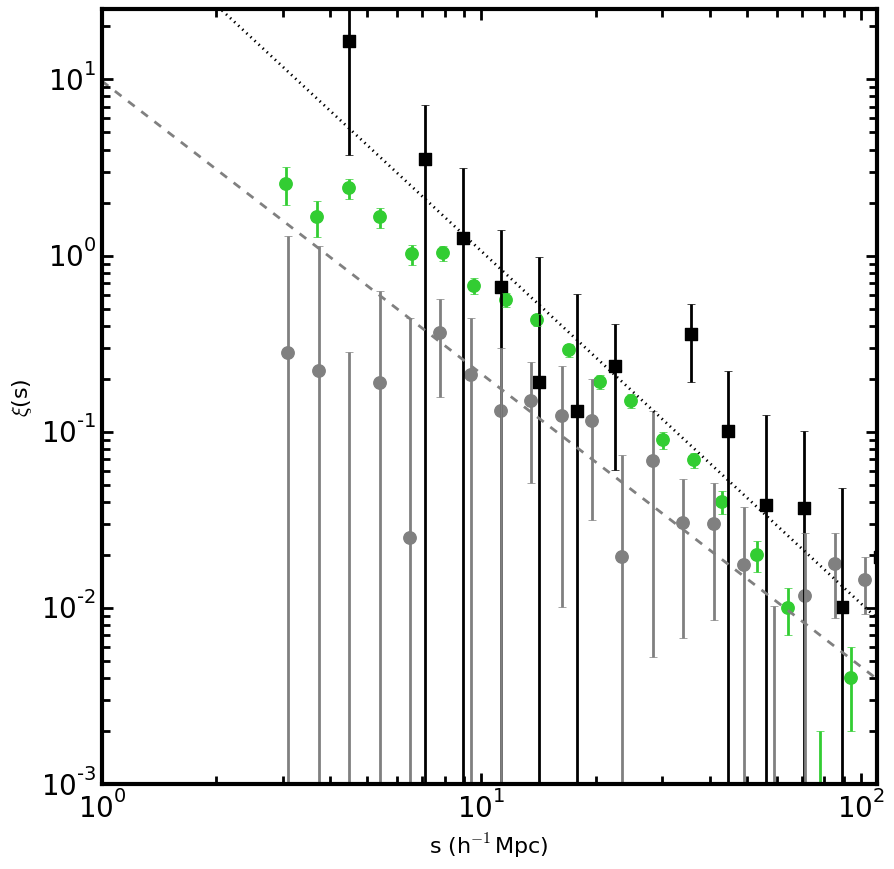

In [13]:
figure(1,figsize=(10,10))
scatter(Shenr,Shenxi,marker='s',color='k',s=80,label='Shen 2007')
errorbar(Shenr,Shenxi,yerr=Shenerr,linestyle="None",linewidth=2,color='k')
#scatter(sep,Axi, color='b',s=80,label='Andrews C code')
#errorbar(10**R,Xi,yerr=errxi,linestyle="None",linewidth=2,color='b')
#scatter(csep,cxifull,s=80,color='b',label = 'Andrews calc')
scatter(sep,xifull,s=80,color='#808080',label='SpIES 2.9<z<5')
errorbar(sep,xifull,yerr=sigma,linestyle="None",linewidth=2,color='#808080')
scatter(Es,Exi,s=80,color='#32CD32',label='Eft 2015')
errorbar(Es,Exi,yerr=Eerr,linestyle="None",linewidth=2,color='#32CD32')
#errorbar(sep,xifull,yerr=Poisson_err,linestyle="None",linewidth=2,color='r')
plt.plot(np.linspace(1,300,100),Model(np.linspace(1,300,100),popt[0],popt[1]),linewidth = 2, linestyle = '--',color = '#808080',label = r'Candidate Fit $8<s<70h^{-1}Mpc$')
plt.plot(np.linspace(1,300,100),Model(np.linspace(1,300,100),10.3,2),linewidth = 2, linestyle = ':',color = 'k',label = r'Shen Fit $\delta=2,s_0=10.2$')
#plt.plot(np.linspace(1,300,100),Model(np.linspace(1,300,100),5.95,1.16),linewidth = 2, linestyle = '-',color = 'b',label = r'Ross Fit $1<s<25h^{-1}Mpc$')

xscale('log')
yscale('log')
ylim(10**-3,25)
xlim(1,110)
xlabel(r's (h$^{-1}$Mpc)',fontsize=16)
ylabel(r'$\xi$(s)',fontsize=16)
#legend(scatterpoints=1)
#savefig('Candidate_highz_zspace_corrfunc_spies_shen.png')


## Compare z space

In [14]:
##########################
###Open data set
##########################

infilelz = '../Xis_Candidates_lowz.txt'

datalz = open(infilelz,'rw')

headerlz=datalz.readline()

seplz=[]
xifulllz=[]
sigmalz=[]
RRlz=[]
DDlz=[]
datlz=datalz.readlines()
for i in range(len(datlz)):
    seplz.append(float(datlz[i].split()[0]))
    xifulllz.append(float(datlz[i].split()[4]))
    sigmalz.append(float(datlz[i].split()[5]))
    RRlz.append(float(datlz[i].split()[3]))
    DDlz.append(float(datlz[i].split()[1]))
#Calculate Poisson error

Poisson_errlz = (1+np.array(xifulllz))/np.sqrt(1.0*np.array(DDlz))

LS_errlz = (1+np.array(xifulllz))/np.sqrt(4996.0)

print 'Poisson Errors calculated'

Poisson Errors calculated


In [15]:
Radlz = np.asarray(seplz)
lzdx = (Radlz>5) & (Radlz<25)
poptlz, pcovlz = curve_fit(Model,Radlz[lzdx],np.asarray(xifulllz)[lzdx],sigma=np.asarray(sigmalz)[lzdx])
print poptlz

[ 0.94898538  0.91398641]


In [16]:
infilehz = '../Xis_Candidates_highz.txt'

datahz = open(infilehz,'rw')

headerhz=datahz.readline()

sephz=[]
xifullhz=[]
sigmahz=[]
RRhz=[]
DDhz=[]
dathz=datahz.readlines()
for i in range(len(dathz)):
    sephz.append(float(dathz[i].split()[0]))
    xifullhz.append(float(dathz[i].split()[4]))
    sigmahz.append(float(dathz[i].split()[5]))
    RRhz.append(float(dathz[i].split()[3]))
    DDhz.append(float(dathz[i].split()[1]))
#Calculate Poisson error

Poisson_errhz = (1+np.array(xifullhz))/np.sqrt(1.0*np.array(DDhz))

LS_errhz = (1+np.array(xifullhz))/np.sqrt(4996.0)

print xifullhz
print 'Poisson Errors calculated'

[0.693340365694, -1.11204942066, -0.520795309111, 0.543620911395, 0.319271686306, -0.0370739357802, 0.536623752097, -0.123249443773, 0.348774041805, 0.12149491802, -0.0423381833644, 0.0645655203446, 0.0862971974054, 0.00312490624189, 0.0747179471032, 0.038775046937, 0.015490620296, 0.0243133496692, 0.0209806332199, 0.0191183758461]
Poisson Errors calculated


/home/john/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in divide


In [18]:
Radhz = np.asarray(sephz)
hzdx = (Radhz>5) & (Radhz<25)
popthz, pcovhz = curve_fit(Model,Radhz[hzdx],np.asarray(xifullhz)[hzdx],sigma=np.asarray(sigmahz)[hzdx])
print popthz

/home/john/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

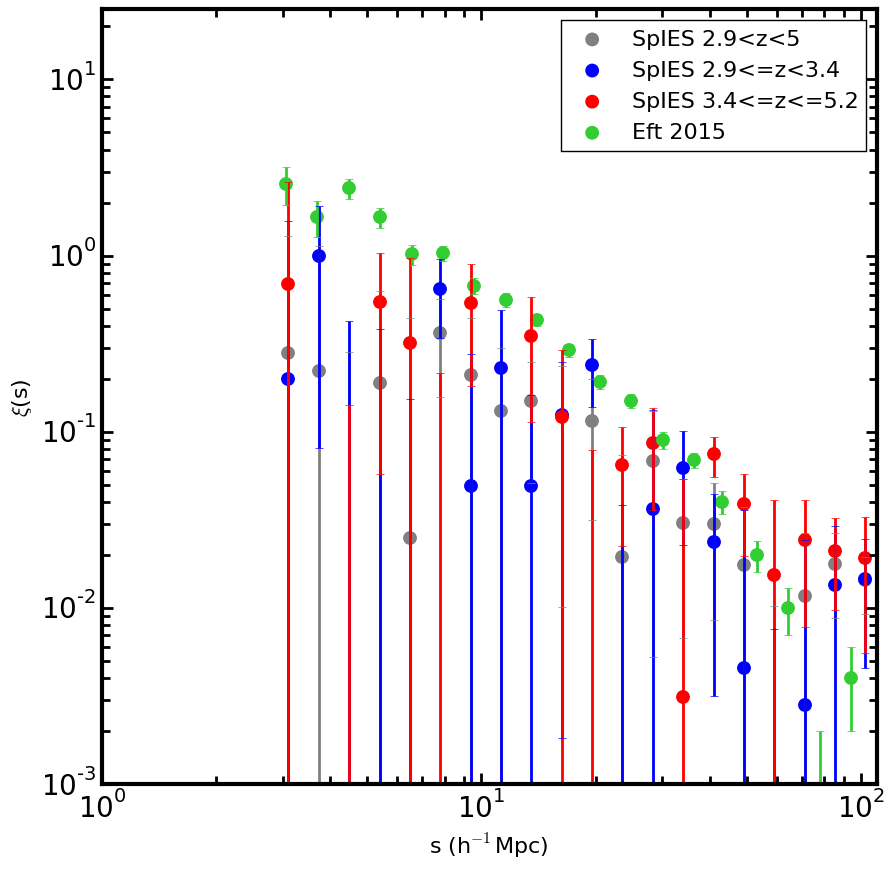

In [20]:
figure(2,figsize=(10,10)) 
#scatter(Shenr,Shenxi,marker='s',color='k',s=80,label='Shen 2007')
#errorbar(Shenr,Shenxi,yerr=Shenerr,linestyle="None",linewidth=2,color='k')

scatter(sep,xifull,s=80,color='#808080',label='SpIES 2.9<z<5')
errorbar(sep,xifull,yerr=sigma,linestyle="None",linewidth=2,color='#808080')

scatter(seplz,xifulllz,s=80,color='b',label='SpIES 2.9<=z<3.4')
errorbar(seplz,xifulllz,yerr=sigmalz,linestyle="None",linewidth=2,color='b')

scatter(sephz,xifullhz,s=80,color='r',label='SpIES 3.4<=z<=5.2')
errorbar(sephz,xifullhz,yerr=sigmahz,linestyle="None",linewidth=2,color='r')

scatter(Es,Exi,s=80,color='#32CD32',label='Eft 2015')
errorbar(Es,Exi,yerr=Eerr,linestyle="None",linewidth=2,color='#32CD32')

#errorbar(sep,xifull,yerr=Poisson_err,linestyle="None",linewidth=2,color='r')
#plt.plot(np.linspace(1,300,100),Model(np.linspace(1,300,100),popt[0]),linewidth = 2, linestyle = '--',color = '#808080',label = r'Candidate Fit $8<s<25h^{-1}Mpc$')
#plt.plot(np.linspace(1,300,100),Model(np.linspace(1,300,100),poptlz[0]),linewidth = 2, linestyle = '-',color = 'b',label = r'lz Candidate Fit $8<s<25h^{-1}Mpc$')
#plt.plot(np.linspace(1,300,100),Model(np.linspace(1,300,100),popthz[0]),linewidth = 2, linestyle = '-',color = 'r',label = r'hz Candidate Fit $8<s<25h^{-1}Mpc$')
#plt.plot(np.linspace(1,300,100),Model(np.linspace(1,300,100),10.3,1.43),linewidth = 2, linestyle = ':',color = 'k',label = r'Shen Fit $1<s<100h^{-1}Mpc$')
#plt.plot(np.linspace(1,300,100),Model(np.linspace(1,300,100),5.95,1.16),linewidth = 2, linestyle = '-',color = 'b',label = r'Ross Fit $1<s<25h^{-1}Mpc$')

xscale('log')
yscale('log')
ylim(10**-3,25)
xlim(1,110)
xlabel(r's (h$^{-1}$Mpc)',fontsize=16)
ylabel(r'$\xi$(s)',fontsize=16)
legend(scatterpoints=1)